In [1]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from data_processor import DataProcessor
from regressor import Regressor

In [2]:
ds = xr.open_dataset("../data.grib")
data = ds.t2m.to_numpy()

AUTOREG_SEQUENCE_LENGTH = 5
processor = DataProcessor(data)
latitude, longitude = processor.get_latitude_longitude()
X, y = processor.preprocess(AUTOREG_SEQUENCE_LENGTH)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


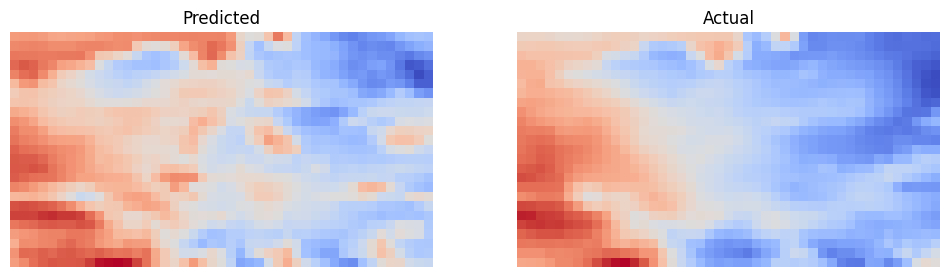

MSE: 11.829938996886508; R2: -0.7457825695480749


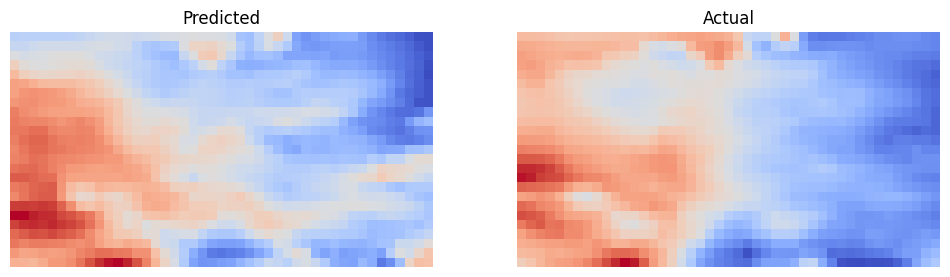

MSE: 2.3156144769992584; R2: 0.6095959135789554


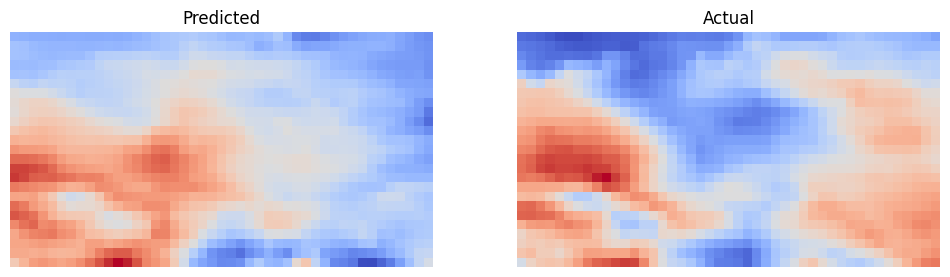

MSE: 17.228673794898707; R2: -3.903453807398501


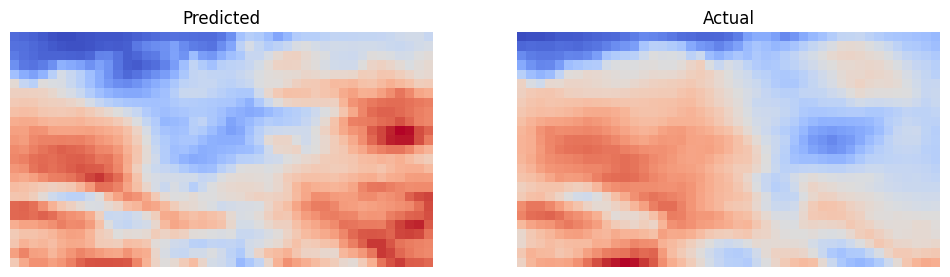

MSE: 17.813589110120564; R2: -1.9043104124623333


In [5]:
linearreg = Regressor(latitude, longitude)
linearreg.train(X_train, y_train)
linearreg.predict_and_evaluate(X_test, y_test, limit=4)

In [4]:
# plt.figure(figsize=(12,10))
# yy = y[0].reshape(1,-1)
# plt.imshow(yy[:,:10], cmap=plt.cm.coolwarm)
# plt.show()